In [1]:
import pandas as pd
from __future__ import division
from numpy  import array, shape, where, in1d
import math
import time
import nose
import numpy as np
import random
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('heart.csv')
df2=pd.read_csv('heart.csv')

In [3]:
len(df)

303

In [33]:
rows =300
eps = 0.55
minPts =4


In [16]:
data = df.sample(rows)
#data['Index'] = np.arange(data.shape[0])
sample_df=data.copy()
sample_df['Index'] = np.arange(sample_df.shape[0])

In [17]:
len(data)

300

In [18]:
data = np.array(data)

In [19]:
def mutual_information(x_index, y_index, log_base, n_rows , n_cols , debug = False):
        """
        Calculate and return Mutual information between two random variables
        """
        # Check if index are into the bounds
        assert (x_index >= 0 and x_index < n_rows)
        assert (y_index >= 0 and y_index < n_rows)
        # Variable to return MI
        summation = 0.0
        # Get uniques values of random variables
        values_x = set(data[x_index])
        values_y = set(data[y_index])
        # For each random
        for value_x in values_x:
            for value_y in values_y:
                px = shape(where(data[x_index]==value_x))[1] / n_cols
                py = shape(where(data[y_index]==value_y))[1] / n_cols
                pxy = len(where(in1d(where(data[x_index]==value_x)[0], 
                                where(data[y_index]==value_y)[0])==True)[0]) / n_cols
                if pxy > 0.0:
                    summation += pxy * math.log((pxy / (px*py)), log_base)
                if debug:
                    print('(%d,%d) px:%f py:%f pxy:%f' % (value_x, value_y, px, py, pxy))
        return summation
    
d = list()
for i in range (data.shape[0]) :
    temp = list()
    for j in range (data.shape[0]) :
        temp.append(mutual_information(i,j,10,data.shape[0] , data.shape[1]))
    temp[i] = -10000
    d.append(temp)

In [34]:
vis = list () 
for i in range (rows ) :
    vis.append(False)

In [35]:
m =dict()
for i in range(rows) :
    m[i] = list()
    for j in range(rows) :
        if d[i][j] <=eps  :
            m[i].append(j)
    

In [36]:
core = list () 
for key in m  :
    if len(m[key]) >=minPts :
        core.append(key)

In [37]:
cluster = list ()

In [38]:
def isDenselyConnected  (i,j) :
    for r in m:
        if i in m[r] and j in m[r] :
            return True
    return False
    

In [39]:
for i in core  :
#     print(i)
    if vis[i] :
        continue 
    temp = list ()
    temp.append(i) 
    for j in range (rows ) :
        if vis[j]==True :
            continue
        elif isDenselyConnected (i,j) :
            vis[j] = True
            if i!=j:
              temp.append(j)
        
    if len(temp)>1:
     cluster.append(temp)
   
print(f'Total Clusters formed {len(cluster)}')    

Total Clusters formed 1


In [26]:
str(cluster)

'[[3, 1, 2, 4, 7, 9, 11, 12, 14, 16, 19, 20, 22, 23, 25, 27, 29, 30, 31, 32, 36, 37, 38, 39, 40, 42, 43, 44, 47, 48, 51, 52, 53, 54, 55, 56, 57, 59, 60, 65, 66, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 84, 85, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 105, 108, 110, 111, 112, 114, 117, 118, 119, 120, 121, 122, 123, 125, 126, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 144, 145, 146, 147, 148, 149, 150, 153, 154, 155, 156, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 175, 176, 177, 181, 182, 183, 185, 187, 188, 189, 191, 193, 194, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 208, 210, 211, 213, 214, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 230, 231, 232, 233, 234, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 275, 277, 278, 279, 282, 283, 286, 287, 289, 290, 291, 292, 294, 295, 296, 297,

In [17]:
def MeanFromRange(a,b):
    sum=0
    a=int(a)
    b=int(b)
    for i in range(a,b+1):
        sum+=i
    return sum/(b-a+1)    

In [180]:
df2=df.copy()
Mic_DBSCAN_Cluster=pd.DataFrame()

In [181]:
def getMaxMinValue(cluster):
    
    maxiage=df['age'][cluster[0]]
    miniage=df['age'][cluster[0]]
    maxitrestbps=df['trestbps'][cluster[0]]
    minitrestbps=df['trestbps'][cluster[0]]
    maxichol=df['chol'][cluster[0]]
    minichol=df['chol'][cluster[0]]
    maxithalach=df['thalach'][cluster[0]]
    minithalach=df['thalach'][cluster[0]]
    
   
    
    for i in cluster:
          maxiage=max(maxiage,df2['age'][i])
          miniage=min(miniage,df2['age'][i])
          maxitrestbps=max(maxitrestbps,df2['trestbps'][i])
          minitrestbps=min(minitrestbps,df2['trestbps'][i])
          maxichol=max(maxichol,df2['chol'][cluster[0]])
          minichol=min(minichol,df2['chol'][cluster[0]])
          maxithalach=max(maxithalach,df2['thalach'][i])
          minithalach=min(df2['thalach'][i],minithalach)  
         
    return str(maxiage+1),str(miniage-1),str(maxitrestbps+1),str(minitrestbps-1),str(maxichol+1),str(minichol-1),str(maxithalach+1),str(minithalach-1)  



def anonymizeClusters(clusters):
    dataframes=list()
    old_mean_age=df2['age'].mean()
    old_mean_thalach=df2['thalach'].mean()
    old_mean_trestbps=df2['trestbps'].mean()
    old_mean_chol=df2['chol'].mean()
    cluster_count=0
    for cluster in clusters:
        dataframe=list()
        maxiage,miniage,maxitrestbps,minitrestbps,maxichol,minichol,maxithalach,minithalach =getMaxMinValue(cluster)
        
        new_mean_age=MeanFromRange(miniage,maxiage)
        
        new_mean_trestbps=MeanFromRange(minitrestbps,maxitrestbps)
       
        new_mean_chol=MeanFromRange(minichol,maxichol)
        
        new_mean_thalach=MeanFromRange(minithalach,maxithalach)
        utility_age=abs(old_mean_age-new_mean_age)/(old_mean_age+new_mean_age)
        utility_trestbps=abs(old_mean_trestbps-new_mean_trestbps)/(old_mean_trestbps+new_mean_trestbps)
        utility_chol=abs(old_mean_chol-new_mean_chol)/(old_mean_chol+new_mean_chol)
        utility_thalach=abs(old_mean_thalach-new_mean_thalach)/(old_mean_thalach+new_mean_thalach)
#         print(type(maxage))
       
        
      
        for i in cluster:
           
            df2['age'][i]=miniage+"-"+maxiage
            df2['trestbps'][i]=minitrestbps+"-"+maxitrestbps
            df2['chol'][i]=minichol+"-"+maxichol
            df2['thalach'][i]=minithalach+"-"+maxithalach
            dataframe.append(df2.iloc[i])
          
          
  
        ndf=pd.DataFrame(dataframe)
        cluster_count+=1
        print(f'CLUSTER----{cluster_count}')
        print(ndf)
        print('\n')
        print(f'Data Utility of age: {utility_age}')
        print(f'Data Utility of trestbps: {utility_trestbps}')
        print(f'Data Utility of cholestrol: {utility_chol}')
        print(f'Data Utility of thalach: {utility_thalach}')
        print('\n')
  

    

In [182]:

cluster_index=list()
index=0
frames=list()
for ele in cluster:
    index+=1
    for i in ele:
     
     frames.append(sample_df.loc[sample_df['Index'] == i])
     cluster_index.append(index)

        
Mic_DBSCAN_Cluster=pd.concat(frames)
Mic_DBSCAN_Cluster["Cluster"]=cluster_index
    

In [221]:
clustering = DBSCAN(eps=34, min_samples=12).fit(sample_df)
Mic_DBSCAN_Cluster = sample_df.copy()
Mic_DBSCAN_Cluster.loc[:,'Cluster'] = clustering.labels_

In [222]:
Mic_DBSCAN_Cluster.Cluster.value_counts().to_frame()

,Cluster
-1,184
0,61
1,26
3,18
2,11


In [218]:
df2=df.copy()
anonymizeClusters(cluster)

CLUSTER----1
       age  sex  cp trestbps     chol  fbs  restecg thalach  exang  oldpeak  \
0    28-78    1   3   99-201  232-234    1        0  87-203      0      2.3   
2    28-78    0   1   99-201  232-234    0        0  87-203      0      1.4   
3    28-78    1   1   99-201  232-234    0        1  87-203      0      0.8   
4    28-78    0   0   99-201  232-234    0        1  87-203      1      0.6   
5    28-78    1   0   99-201  232-234    0        1  87-203      0      0.4   
..     ...  ...  ..      ...      ...  ...      ...     ...    ...      ...   
294  28-78    1   0   99-201  232-234    0        1  87-203      1      2.8   
295  28-78    1   0   99-201  232-234    0        0  87-203      1      4.0   
297  28-78    1   0   99-201  232-234    1        0  87-203      0      1.0   
298  28-78    0   0   99-201  232-234    0        1  87-203      1      0.2   
299  28-78    1   3   99-201  232-234    0        1  87-203      0      1.2   

     slope  ca  thal  target  
0      

In [24]:
#Data Utility without forming clusters

def getMaxMinValue2(cluster):
    
    maxiage=max(df['age'])
    miniage=min(df['age'])
    maxitrestbps=max(df['trestbps'])
    minitrestbps=min(df['trestbps'])
    maxichol=max(df['chol'])
    minichol=min(df['chol'])
    maxithalach=max(df['thalach'])
    minithalach=min(df['thalach'])
    
   
    
  
         
    return str(maxiage+1),str(miniage-1),str(maxitrestbps+1),str(minitrestbps-1),str(maxichol+1),str(minichol-1),str(maxithalach+1),str(minithalach-1)  


def anonymizeClusters2(clusters):
        dataframes=list()
        old_mean_age=df2['age'].mean()
        old_mean_thalach=df2['thalach'].mean()
        old_mean_trestbps=df2['trestbps'].mean()
        old_mean_chol=df2['chol'].mean()
        cluster_count=0
#     for cluster in clusters:
        dataframe=list()
        maxiage,miniage,maxitrestbps,minitrestbps,maxichol,minichol,maxithalach,minithalach =getMaxMinValue2(df)
        
        new_mean_age=MeanFromRange(miniage,maxiage)
        
        new_mean_trestbps=MeanFromRange(minitrestbps,maxitrestbps)
       
        new_mean_chol=MeanFromRange(minichol,maxichol)
        
        new_mean_thalach=MeanFromRange(minithalach,maxithalach)
        utility_age=abs(old_mean_age-new_mean_age)/(old_mean_age+new_mean_age)
        utility_trestbps=abs(old_mean_trestbps-new_mean_trestbps)/(old_mean_trestbps+new_mean_trestbps)
        utility_chol=abs(old_mean_chol-new_mean_chol)/(old_mean_chol+new_mean_chol)
        utility_thalach=abs(old_mean_thalach-new_mean_thalach)/(old_mean_thalach+new_mean_thalach)
#         print(type(maxage))
       
        
      
        for i in df.index:
           
            df2['age'][i]=miniage+"-"+maxiage
            df2['trestbps'][i]=minitrestbps+"-"+maxitrestbps
            df2['chol'][i]=minichol+"-"+maxichol
            df2['thalach'][i]=minithalach+"-"+maxithalach
            
#             dataframe.append(df2.iloc[i])
          
          
  
#         ndf=pd.DataFrame(dataframe)
     
     
        print(df2)
        print('\n')
        print(f'Data Utility of age: {utility_age}')
        print(f'Data Utility of trestbps: {utility_trestbps}')
        print(f'Data Utility of cholestrol: {utility_chol}')
        print(f'Data Utility of thalach: {utility_thalach}')
        print('\n')
  

In [25]:
df2=df.copy()
anonymizeClusters2(df)

       age  sex  cp trestbps     chol  fbs  restecg thalach  exang  oldpeak  \
0    28-78    1   3   93-201  125-565    1        0  70-203      0      2.3   
1    28-78    1   2   93-201  125-565    0        1  70-203      0      3.5   
2    28-78    0   1   93-201  125-565    0        0  70-203      0      1.4   
3    28-78    1   1   93-201  125-565    0        1  70-203      0      0.8   
4    28-78    0   0   93-201  125-565    0        1  70-203      1      0.6   
..     ...  ...  ..      ...      ...  ...      ...     ...    ...      ...   
298  28-78    0   0   93-201  125-565    0        1  70-203      1      0.2   
299  28-78    1   3   93-201  125-565    0        1  70-203      0      1.2   
300  28-78    1   0   93-201  125-565    1        1  70-203      0      3.4   
301  28-78    1   0   93-201  125-565    0        1  70-203      1      1.2   
302  28-78    0   1   93-201  125-565    0        0  70-203      0      0.0   

     slope  ca  thal  target  
0        0   0     1

In [230]:
clusters=DBSCAN_dataset['Cluster'].unique()
clusters

array([ 0, -1,  1,  2,  3,  4], dtype=int64)

In [232]:
original_clusters=list()
clusters=DBSCAN_dataset['Cluster'].unique()
for i in clusters:
    if i!=-1:
        cluster_list=list()
        for j in DBSCAN_dataset.index:
            if DBSCAN_dataset['Cluster'][j]==i:
                cluster_list.append(j)
        original_clusters.append(cluster_list)        
# df2=df.copy()
# anonymizeClusters(DBSCAN_dataset)

In [234]:
df2=df.copy()
anonymizeClusters(original_clusters)

CLUSTER----1
       age  sex  cp trestbps     chol  fbs  restecg  thalach  exang  oldpeak  \
0    50-70    1   3  123-151  232-234    1        0  114-155      0      2.3   
19   50-70    0   3  123-151  232-234    0        1  114-155      0      1.8   
34   50-70    1   3  123-151  232-234    0        0  114-155      1      1.4   
48   50-70    0   2  123-151  232-234    0        0  114-155      0      0.0   
52   50-70    1   2  123-151  232-234    0        1  114-155      0      1.8   
137  50-70    1   1  123-151  232-234    1        0  114-155      0      0.0   
155  50-70    0   0  123-151  232-234    0        1  114-155      0      0.6   
158  50-70    1   1  123-151  232-234    0        1  114-155      0      0.4   
174  50-70    1   0  123-151  232-234    0        0  114-155      1      2.4   
191  50-70    1   0  123-151  232-234    0        0  114-155      1      2.2   
210  50-70    1   2  123-151  232-234    0        0  114-155      0      0.4   
242  50-70    1   0  123-15

In [26]:
array=df.values
array

#####normalize data############
from sklearn.preprocessing import StandardScaler
stsclr=StandardScaler().fit(array)
norm_data=stsclr.transform(array)



In [27]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [28]:
clustering = DBSCAN(eps=13.5, min_samples=4).fit(df)
DBSCAN_dataset = df.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

In [29]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
-1,165
1,102
0,18
2,10
3,4
4,4


In [30]:
DBSCAN_dataset2=DBSCAN_dataset.copy()
DBSCAN_dataset2.drop('Cluster', inplace=True, axis=1)


KeyError: 'a'

In [31]:
DBSCAN_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Cluster
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,-1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,-1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,-1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,-1


In [32]:
len(Mic_DBSCAN_Cluster)

300

In [223]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(DBSCAN_dataset)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['PC1', 'PC2'])
principalComponents2 = pca.fit_transform(Mic_DBSCAN_Cluster)
principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['PC1', 'PC2'])

In [224]:
Cluster_col1=DBSCAN_dataset['Cluster']

principalDf1=principalDf1.join(Cluster_col1)

principalDf1.drop(principalDf1[principalDf1['Cluster'] == -1].index, inplace = True)

In [225]:
Cluster_col2=list(Mic_DBSCAN_Cluster["Cluster"])

principalDf2["Cluster"]=Cluster_col2
principalDf2.drop(principalDf2[principalDf2['Cluster'] == -1].index, inplace = True)
principalDf2

,PC1,PC2,Cluster
0,150.710087,-33.066158,0
2,148.924608,-29.920942,0
3,147.450179,-30.601367,0
4,146.521415,-6.648473,0
5,145.023813,10.394668,0
...,...,...,...
245,-94.926059,-19.779833,3
247,-96.209804,-16.275125,3
248,-97.975589,-1.405556,3
257,-107.461780,-2.466260,3


[Text(0.5, 1.0, 'Clusters formed by Modified DBScan')]

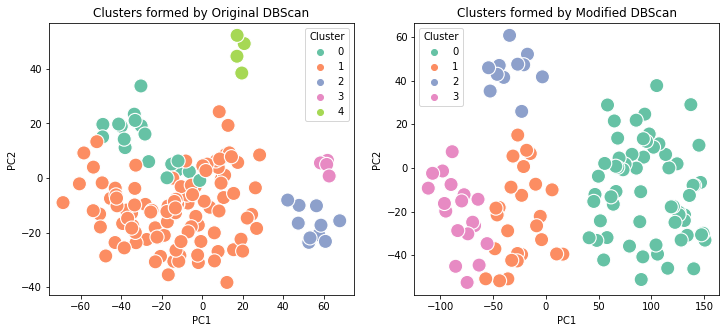

In [226]:

Cluster_col=DBSCAN_dataset['Cluster']
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))
#plt.scatter(principalDf['X'],principalDf['Y'],c=principalDf['Cluster'])
sns.scatterplot('PC1','PC2',

                data=principalDf1,

                hue=principalDf1['Cluster'], ax=axes[0], palette='Set2', legend='full', s=200).set(title='Clusters formed by Original DBScan')

sns.scatterplot('PC1','PC2',

                data=principalDf2,

                hue=principalDf2["Cluster"], ax=axes[1], palette='Set2', legend='full', s=200).set(title='Clusters formed by Modified DBScan')
